### Lead Scoring Case Study
###### Approach
1. Importing Data
2. Inspecting the Dataframe
3. Data Preparation (Encoding Categorical Variables, Handling Null Values)
4. EDA (univariate analysis, outlier detection, checking data imbalance)
5. Dummy Variable Creation
6. Test-Train Split
7. Feature Scaling
8. Looking at Correlations
9. Model Building (Feature Selection Using RFE, Improvising the model further inspecting adjusted R-squared, VIF and p-vales)
10. Build final model
11. Model evaluation with different metrics accuracy, Sensitivity, Specificity on test set

### Step 1: Importing Data

In [309]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [310]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
#Importing leads dataset
leads_data =  pd.read_csv("Leads.csv")
pd.set_option('display.max_columns',None)
leads_data.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


### Step 2: Inspecting the Dataframe

In [312]:
#checking the dimensions of the dataframe
leads_data.shape

(9240, 37)

In [313]:
# looking at the statistical aspects of dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# analyiz the data and its types
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [317]:
#checking Missing data percentage
round(leads_data.isnull().mean().sort_values(ascending=False)*100,2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Observation:
- We need to encode the categorical variables
- we have handle missing value
- We need to conver default value(select) to NAN


### Step 3: Data Preparation
Converting some binary variables(Yes/No to 0/1)

In [318]:
# List of binary variables to map
varlist = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']


leads_data[varlist] = leads_data[varlist].apply(lambda x : x.map({'Yes':1,"No":0}))


In [319]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


#### converting Select  into NaNs
for some columns we have select as values which is by default inplace of null values

In [320]:
leads_data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [321]:
#Checking the labels of the categorical variables

leads_cat = leads_data.select_dtypes(include='object')
for col in leads_cat.iloc[:,1:].columns:
    print(col)
    print("-"*80)
    print(leads_cat[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    print("-"*80)

Lead Origin
--------------------------------------------------------------------------------
Lead Origin
Landing Page Submission    52.9%
API                        38.7%
Lead Add Form               7.8%
Lead Import                 0.6%
Quick Add Form              0.0%
Name: proportion, dtype: object
--------------------------------------------------------------------------------
Lead Source
--------------------------------------------------------------------------------
Lead Source
Google               31.2%
Direct Traffic       27.6%
Olark Chat           19.1%
Organic Search       12.5%
Reference             5.8%
Welingak Website      1.5%
Referral Sites        1.4%
Facebook              0.6%
bing                  0.1%
google                0.1%
Click2call            0.0%
Press_Release         0.0%
Social Media          0.0%
Live Chat             0.0%
youtubechannel        0.0%
testone               0.0%
Pay per Click Ads     0.0%
welearnblog_Home      0.0%
WeLearn               0.0%

In [322]:
# Converting all the selects to NaN as it is a default value and not entered by users so it is as good as "NaN"


leads_data = leads_data.replace('Select',np.nan)

In [323]:
round(leads_data.isnull().mean().sort_values(ascending=False)*100,2)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

We need to delete the columns that has null values more than 70% as they cannot be imputed

#### Handling null values

In [324]:
# retriving colums that has null percentage greater than 70%
null_cols = leads_data.isnull().mean()[leads_data.isnull().mean().sort_values(ascending=False)*100 > 70].index

In [325]:
# deleting colums where null vall are > 70 %
leads_data.drop(null_cols, axis=1, inplace=True)

In [326]:
# Lead Quality depends on the intuitive of the education company employee , it would make sense to convert null values to "Not sure"

leads_data['Lead Quality'] = leads_data['Lead Quality'].replace(np.nan,"Not Sure")

**Comment**: There are too many variations in the Asymeteric columns and it will not make sense to imput them with mode value as the null percentage is having almost the same or high, hence we will drop all of them

In [327]:
asym_cols = []
for col in leads_data.columns:
    if col.startswith('Asymmetrique'):
        asym_cols.append(col)

leads_data.drop(asym_cols, axis =1, inplace=True)

We will try to impute the missing value for these fields
- City                                             39.71
- Specialization                                   36.58
- Tags                                             36.29
- What matters most to you in choosing a course    29.32
- What is your current occupation                  29.11
- Country                                          26.63

In [328]:
# Imputing nan values

# We can impute the "Mumbai" into all the Nulls as mst of values belongs to Mumbai
leads_data['City'] = leads_data['City'].replace(np.nan, "Mumbai")

#Since the top 3 specialization have almost same %, it would be better to imput the null values with other specilizations
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan,"Other Specilization")

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
leads_data['Tags'] = leads_data['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

# Since Email opened has the highest percentage it is ok to impute null value with it
leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan, 'Email Opened')

In [330]:
# lets check the numerics columns quantiles having missing values
leads_data[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [331]:
# Since there are outliers in both the numeric fields it is better to replae null alues with median instead of mean value

leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(),inplace=True)
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(),inplace=True)

In [332]:
# Remaining Null values are less than 1% and hence these rows can be directly dropped
leads_data.dropna(inplace=True)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other Specilization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other Specilization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other Specilization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


In [333]:
# dropping duplicates if it is present
print(leads_data.shape)
leads_data.drop_duplicates(inplace=True)

(9204, 31)


### Step 4 : Exploratory Data Analysis

In [334]:
plt.style.use("ggplot")

In [335]:
# Checking for data imbalance in Target variable

leads_data['Converted'].value_counts(normalize=True)*100

Converted
0    61.62538
1    38.37462
Name: proportion, dtype: float64

We have good representation of both the classes of data and hence we are good  to go wit the futher analysis.

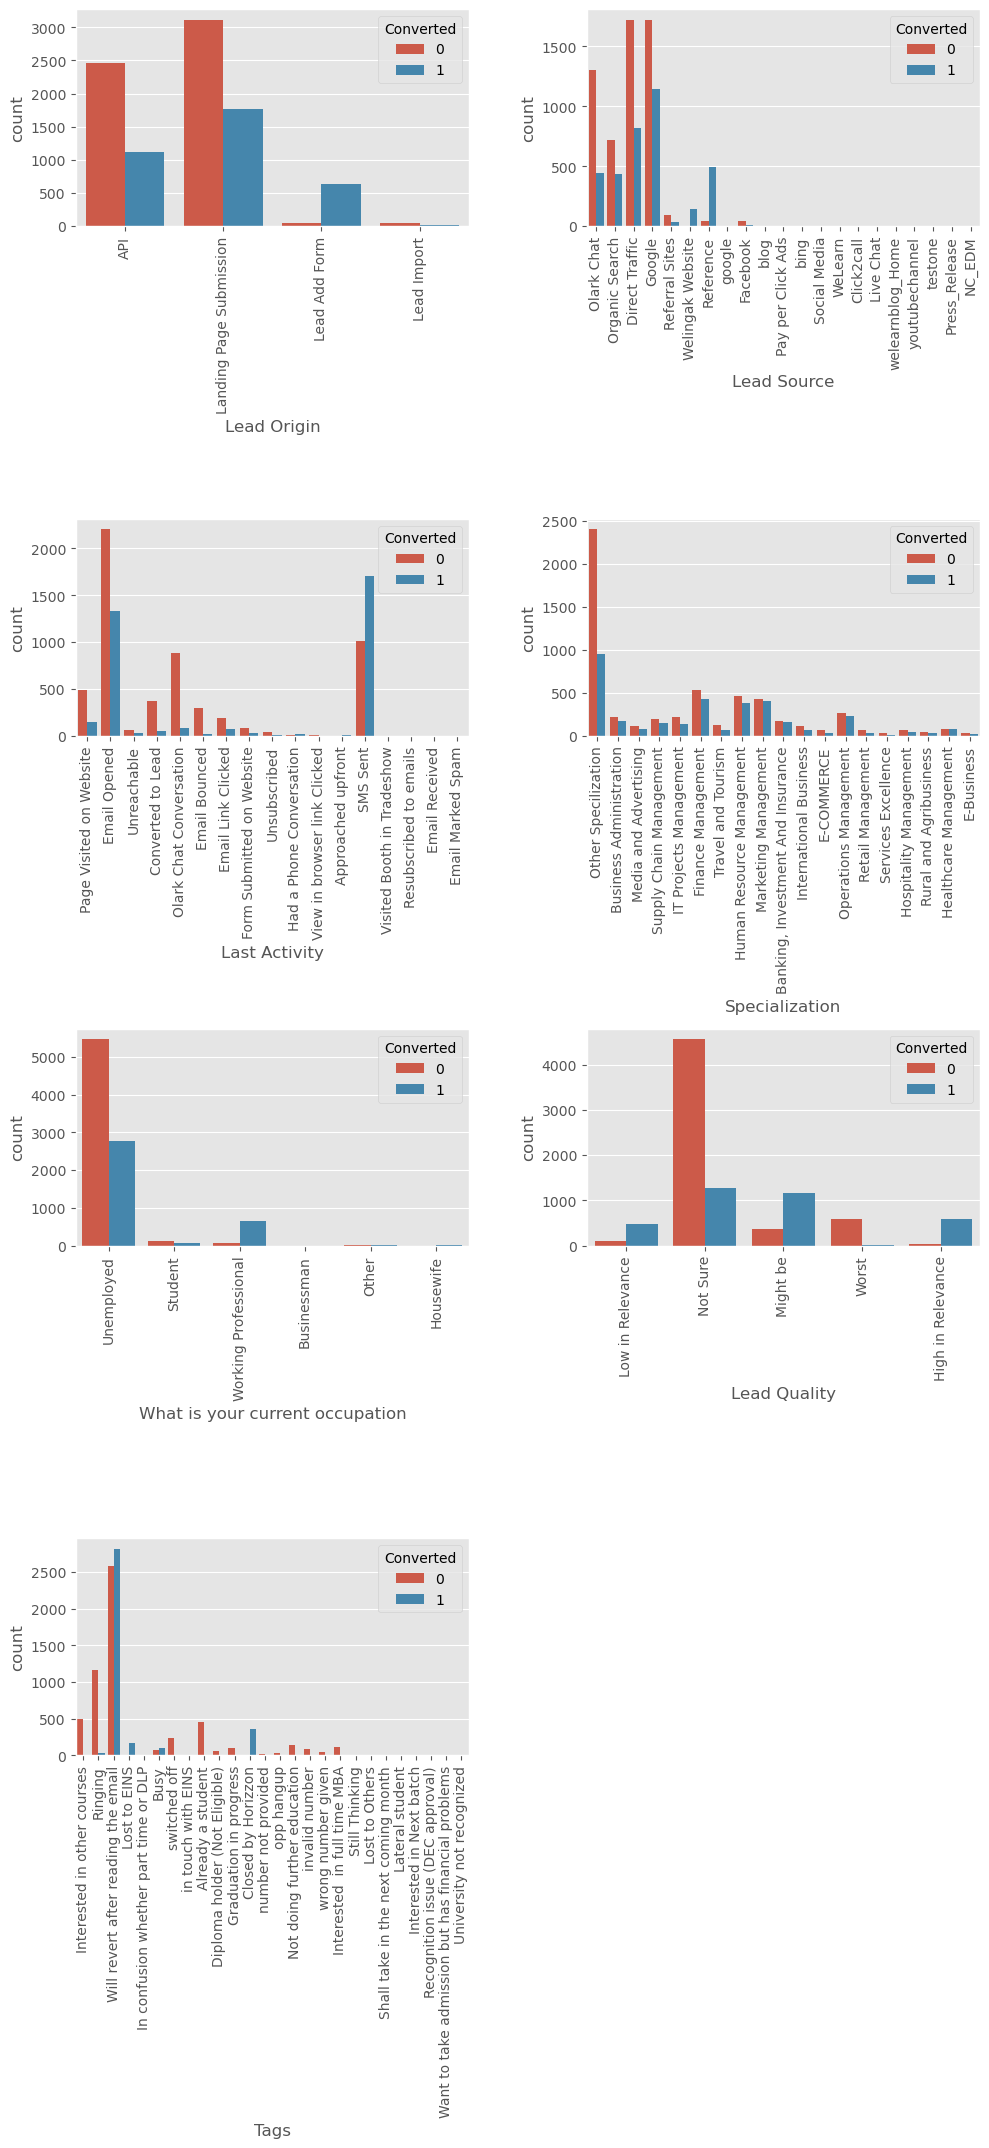

In [336]:
#visualizing the categoricakl features

fig=plt.subplots(figsize=(10, 18))

for i, col in enumerate(['Lead Origin','Lead Source', 'Last Activity','Specialization','What is your current occupation','Lead Quality','Tags']):
    plt.subplot(4, 2, i+1)
    plt.tight_layout()
    plt.subplots_adjust(wspace = .3)
    sns.countplot(data = leads_data, x=col, hue="Converted")
    plt.xticks(rotation=90)

plt.show()

In [337]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

# google is present in two cases merging them together
leads_data['Lead Source'] = leads_data['Lead Source'].replace("google", 'Google')

# Converting all the low count categories to the 'Others' category
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


# Converting all low count categories to Others category
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')


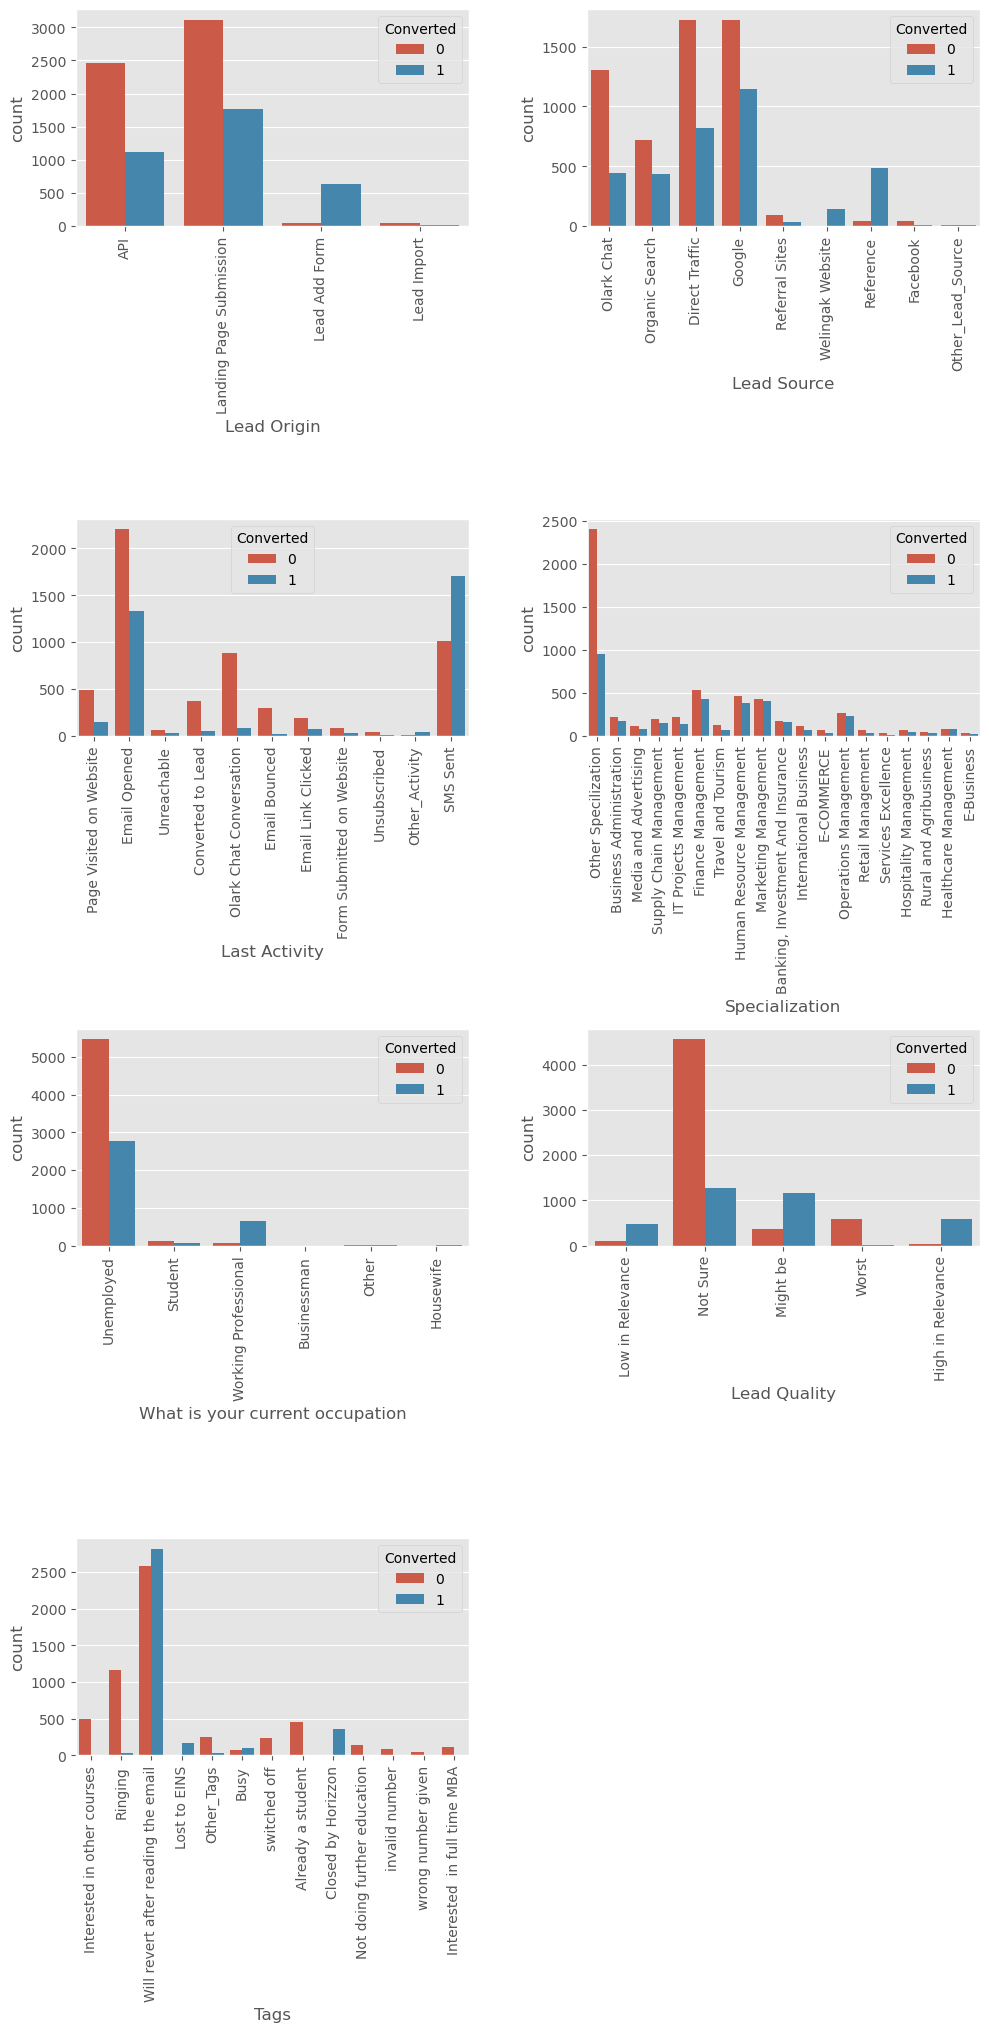

In [338]:

# plotting them again to get insights
fig=plt.subplots(figsize=(10, 18))

for i, col in enumerate(['Lead Origin','Lead Source', 'Last Activity','Specialization','What is your current occupation','Lead Quality','Tags']):
    plt.subplot(4, 2, i+1)
    plt.tight_layout()
    plt.subplots_adjust(wspace = .3)
    sns.countplot(data = leads_data, x=col, hue="Converted")
    plt.xticks(rotation=90)

plt.show()

###### OBSERVATION:
**Lead  Origin**
- API and Landing Page Submission has less conversion rate(~30% ) but counts of the leads from them are considerable
- The count of leads from the Lead Add Form is pretty low but the conversion rate is very high
- Lead Import has very less count as well as conversion rate and hence can be ignored

**Lead Source**
- The count of leads from the Google and Direct Traffic is maximum
- The conversion rate of the leads from Reference and Welingak Website is maximum

**Last Activity**
- The count of lst activity as "Email Opened" is max
- The conversion rate of SMS sent as last activity is maximum
- we need to convert all the low count categories to single category

**Specialization**
- Can't find any reference for specilization as maximum leads and conversion does't have tags

**What is your current occupation**
- working professionals has higher conversion rate
- Student has almost same conversion rate with respect to leads
- Unemployed leads are more but their conersion rate is low

**Lead Quaity**
- High in relevence and Might be has highest conversion rate, low relevence are also not bad

**Tags**
- 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

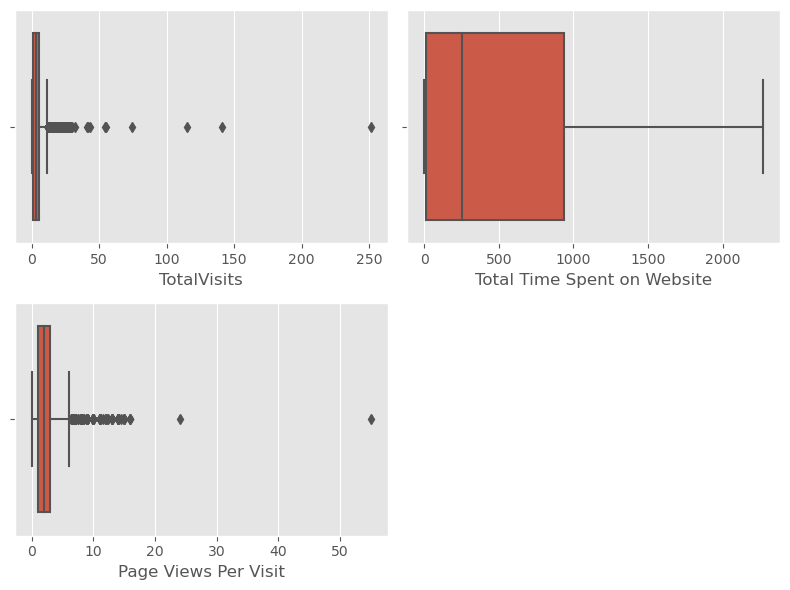

In [339]:
# Visualizing numerical columsn for outliers
fig=plt.subplots(figsize=(8, 6))

for i, num in enumerate(["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x= leads_data[num])
    plt.tight_layout()

In [340]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 
## performing capping 
q_95 = leads_data["TotalVisits"].quantile(0.95)
leads_data["TotalVisits"]= np.where(leads_data["TotalVisits"] > q_95, q_95,leads_data['TotalVisits'])


q_95 = leads_data["Page Views Per Visit"].quantile(0.95)
leads_data["Page Views Per Visit"]= np.where(leads_data["Page Views Per Visit"] > q_95, q_95,leads_data['Page Views Per Visit'])


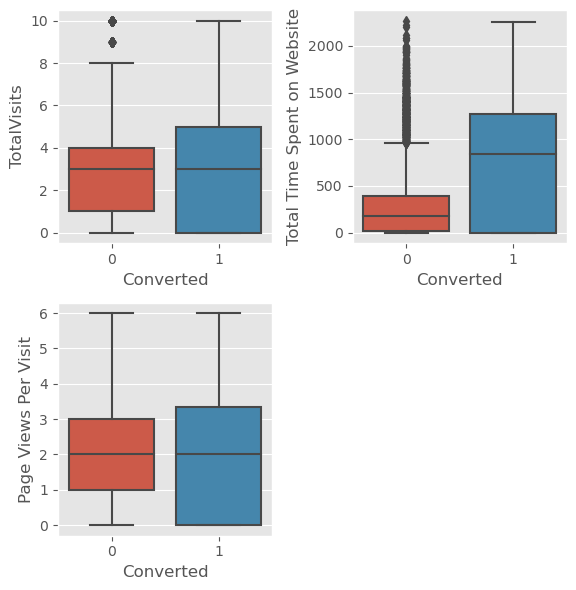

In [341]:
# Visualizing numerical columsn for outliers
fig=plt.subplots(figsize=(6, 6))

for i, col in enumerate(["TotalVisits", "Total Time Spent on Website","Page Views Per Visit"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = col, x = 'Converted', data = leads_data)
    plt.tight_layout()

In [342]:
leads_data[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9204.000000,9204.0,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000,9204.0,9204.0,9204.0,9204.000000
mean,0.001521,0.0,0.000217,0.000109,0.000109,0.000435,0.000761,0.0,0.0,0.0,0.313777
std,0.038973,0.0,0.014740,0.010423,0.010423,0.020844,0.027569,0.0,0.0,0.0,0.464052
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


OBSERVATION:

- Total view/PageViews per visit: The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information

- Users spending more time on the website are more likely to get converted

- We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [343]:
# Dropping unnecessary columns

leads_data = leads_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'], axis=1)

leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other Specilization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other Specilization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other Specilization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


Insights:
    
- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'

- To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

- Websites can be made more appealing so as to increase the time of the Users on websites

- We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

- To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

- We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

### Step 5: Dummy Variable Creation

In [344]:
# Createing dummy variables for all the remaining categorical variable
dummy_data = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True, dtype=int)

dummy_data.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [345]:
# deleting the main columns from Leads table
leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1, inplace=True)

leads_data.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [346]:
# concatenating both the main and dummy tables

df = pd.concat([leads_data, dummy_data], axis= 1)
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [347]:
df.shape

(9204, 86)

### Step 6: Test-Train Split

In [348]:
from sklearn.model_selection import train_test_split

In [349]:
# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [350]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [351]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [352]:
from sklearn.preprocessing import StandardScaler

In [353]:
# standardising the numerical columns in the train set
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other Specilization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5310,0,0.278371,-0.721902,0.968356,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2181,0,1.721643,-0.429014,2.092469,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8215,0,-1.164901,-0.905639,-1.279869,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8887,0,-0.443265,-0.487228,-0.155756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7920,0,0.278371,-0.547261,0.968356,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Step 8: Looking for Correlations

In [354]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = df.corr(numeric_only=True)

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(ascending=False)
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.990813
Lead Origin_Lead Add Form              Lead Source_Reference                            0.875206
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872666
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.852241
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.842692
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800747
TotalVisits                            Page Views Per Visit                             0.766567
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.692004
Do Not Email                           Last Activity_Email Bounced                      0.618989
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.584635
dtype: float64

In [355]:
# Dropping highly correlated features

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Link Clicked','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed','Last Notable Activity_Page Visited on Website'], axis=1)
X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Link Clicked','Last Notable Activity_Unreachable','Last Notable Activity_Unsubscribed','Last Notable Activity_Page Visited on Website'], axis=1)


### Step 9. Model Building
Logistic Regression Model 

In [356]:
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# importinh metrics for evaluations
from sklearn import metrics

###### Running First Training Model to see coefficients andf p values

In [357]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6365
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1335.5
Date:                Fri, 14 Jun 2024   Deviance:                       2671.0
Time:                        20:50:43   Pearson chi2:                 3.62e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3436      1.836     -1.276      0.202      -5.943       1.256
Do Not Email                                            -1.0620      0.301     -3.530      0.000      -1.652      -0.472
TotalVisits                                              0.2159      0.084      2.581      0.010       0.052       0.380
Total Time Spent on Website                              1.1348      0.062     18.272      0.000       1.013       1.257
Page Views Per Visit                                    -0.2263      0.093     -2.431      0.015      -0.409      -0.044
Lead Origin_Landing Page Submission                     -0.8217      0.214     -3.833      0.000      -1.242      -0.402
Lead Origin_Lead Add Form                                0.3147      1.367      0.230      0.818      -2.364       2.994
Lead Origin_Lead Import                                 -0.1229      0.725     -0.169      0.865      -1.544       1.298
Lead Source_Google                                       0.1728      0.149      1.156      0.248      -0.120       0.466
Lead Source_Olark Chat                                   1.0606      0.227      4.664      0.000       0.615       1.506
Lead Source_Organic Search                               0.2942      0.198      1.487      0.137      -0.094       0.682
Lead Source_Other_Lead_Source                            1.1696      0.884      1.323      0.186      -0.563       2.902
Lead Source_Reference                                    0.7227      1.407      0.514      0.607      -2.034       3.480
Lead Source_Referral Sites                               0.3026      0.447      0.677      0.498      -0.573       1.178
Lead Source_Welingak Website                             5.8702      1.717      3.419      0.001       2.505       9.236
Last Activity_Email Bounced                             -0.6377      0.711     -0.896      0.370      -2.032       0.757
Last Activity_Email Link Clicked                        -1.2078      0.459     -2.629      0.009      -2.108      -0.307
Last Activity_Email Opened                               0.1372      0.378      0.363      0.717      -0.604       0.878
Last Activity_Form Submitted on Website                  0.3749      0.580      0.647      0.518      -0.761       1.511
Last Activity_Olark Chat Conversation                   -0.6655      0.393     -1.692      0.091      -1.436       0.105
Last Activity_Other_Activity                            -0.2231      1.067     -0.209      0.834      -2.313       1.867
Last Activity_Page Visited on Website                   -0.6799      0.398     -1.707      0.088      -1.461       0.101
Last Activity_SMS Sent                                   1

### Step 10: Feature Selection Using RFE

In [358]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [359]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [360]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Other_Lead_Source', False, 18),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 36),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Olark Chat Conversation', False, 12),
 ('Last Activity_Other_Activity', False, 35),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 33)

In [374]:
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified'],
      dtype='object')

**Assessing the model with StatsModels**  

#### Model 1

In [375]:
X_train_sm = sm.add_constant(X_train[cols])
logmodel = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
print(res.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1638.3
Date:                Fri, 14 Jun 2024   Deviance:                       3276.7
Time:                        21:29:29   Pearson chi2:                 2.89e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5652
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [376]:
# Gettting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID
0,0,0.014301,5310
1,0,0.118841,2181
2,0,0.062774,8215
3,0,0.702000,8887
4,0,0.268146,7920


In [377]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,Predicted
0,0,0.014301,5310,0
1,0,0.118841,2181,0
2,0,0.062774,8215,0
3,0,0.702000,8887,1
4,0,0.268146,7920,0


In [378]:

# creating vif function 
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

In [379]:
# confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_model1.Convert,y_train_pred_model1.predicted)
print(confusion)
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_model1.Convert , y_train_pred_model1.predicted))

[[3735  165]
 [ 370 2172]]
0.9169512573734865


In [380]:
    
calculate_vif(X_train[cols])

                                             Features   VIF
12                              Lead Quality_Not Sure  3.39
8            Tags_Will revert after reading the email  3.13
14                     Last Notable Activity_Modified  1.74
1                              Last Activity_SMS Sent  1.60
7                                        Tags_Ringing  1.60
2   What is your current occupation_Working Profes...  1.27
5                    Tags_Interested in other courses  1.21
3                                           Tags_Busy  1.13
4                             Tags_Closed by Horizzon  1.13
10                                  Tags_switched off  1.13
13                                 Lead Quality_Worst  1.12
6                                   Tags_Lost to EINS  1.08
0                        Lead Source_Welingak Website  1.05
9                                 Tags_invalid number  1.04
11                            Tags_wrong number given  1.02


All variables have a good value of VIF. But we observed earlier that the column "Tags_wrong number given" has high p-value(.999) and hence we will drop this column and remake the model.

In [381]:
# dropping the high p value column
cols = cols.drop("Tags_wrong number given", 1)
cols

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

**Model-2** 


In [382]:
# Lets re-run the model again using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logmodel = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.9
Date:                Fri, 14 Jun 2024   Deviance:                       3281.7
Time:                        21:30:43   Pearson chi2:                 2.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5649
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [384]:
# Gettting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final['Convert_prob'] = y_train_pred

##### updating 'predicted' with 1 if converted_prtob>.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,Predicted,predicted
0,0,0.014255,5310,0,0
1,0,0.118640,2181,0,0
2,0,0.063031,8215,0,0
3,0,0.700710,8887,1,1
4,0,0.268172,7920,0,0


In [386]:

# confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Convert,y_train_pred_final.Predicted)
print(confusion)
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Convert , y_train_pred_final.Predicted))


[[3734  166]
 [ 370 2172]]
0.9167960260788575


In [387]:
#checking VIF
calculate_vif(X_train[cols])

                                             Features   VIF
11                              Lead Quality_Not Sure  3.35
8            Tags_Will revert after reading the email  3.09
13                     Last Notable Activity_Modified  1.74
7                                        Tags_Ringing  1.59
1                              Last Activity_SMS Sent  1.58
2   What is your current occupation_Working Profes...  1.27
5                    Tags_Interested in other courses  1.21
3                                           Tags_Busy  1.13
4                             Tags_Closed by Horizzon  1.13
10                                  Tags_switched off  1.12
12                                 Lead Quality_Worst  1.11
6                                   Tags_Lost to EINS  1.08
0                        Lead Source_Welingak Website  1.05
9                                 Tags_invalid number  1.03


In [388]:
# Model 2 accuracy looks good, hoever few columns has high p value .
# let remove those columns and see if it makes any difference

# remving "Tags_Interested in other courses" as it has high p value=0.138
cols = cols.drop('Tags_Interested in other courses')
cols

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

**Model -3**

In [389]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[cols])
logmodel = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1642.1
Date:                Fri, 14 Jun 2024   Deviance:                       3284.1
Time:                        21:35:14   Pearson chi2:                 2.89e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5647
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [390]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final['Convert_prob'] = y_train_pred

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,Predicted,predicted
0,0,0.014273,5310,0,0
1,0,0.189663,2181,0,0
2,0,0.062731,8215,0,0
3,0,0.701823,8887,1,1
4,0,0.268199,7920,0,0


In [392]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert , y_train_pred_final.Predicted))

0.9172617199627445


In [394]:
calculate_vif(X_train[cols])

                                             Features   VIF
10                              Lead Quality_Not Sure  3.14
7            Tags_Will revert after reading the email  2.86
12                     Last Notable Activity_Modified  1.66
1                              Last Activity_SMS Sent  1.57
6                                        Tags_Ringing  1.53
2   What is your current occupation_Working Profes...  1.25
3                                           Tags_Busy  1.12
4                             Tags_Closed by Horizzon  1.12
9                                   Tags_switched off  1.11
11                                 Lead Quality_Worst  1.10
5                                   Tags_Lost to EINS  1.07
0                        Lead Source_Welingak Website  1.05
8                                 Tags_invalid number  1.03


Comment: All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [401]:
# Let's take a look at the confusion matrix again

def evaluate_model(y_true, y_pred,print_score=False):
    confusion = metrics.confusion_matrix(y_true , y_pred)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    model_accuracy= metrics.accuracy_score(y_true , y_pred)
    # Let's see the sensitivity of our logistic regression model
    sensitivity= TP / float(TP+FN)
    # Let us calculate specificity
    specificity = TN / float(TN+FP)
    if print_score:
        print("Final Model evaluation on train set")
        print("Confusion Matrix :\n", confusion)
        print('='*30)
        print("Accuracy :", model_accuracy)
        print('='*30)
        print("Sensitivity :", sensitivity)
        print('='*30)
        print("Specificity :", specificity)
        print('='*30)
    return  confusion,model_accuracy,sensitivity,specificity

In [402]:
evaluate_model(y_train_pred_final.Convert,y_train_pred_final.Predicted,print_score=True)

Final Model evaluation on train set
Confusion Matrix :
 [[3736  164]
 [ 369 2173]]
Accuracy : 0.9172617199627445
Sensitivity : 0.8548387096774194
Specificity : 0.9579487179487179


(array([[3736,  164],
        [ 369, 2173]], dtype=int64),
 0.9172617199627445,
 0.8548387096774194,
 0.9579487179487179)

### Step 11: Plotting ROC curve
 

In [403]:


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [404]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Convert,y_train_pred_final.Convert_prob, drop_intermediate=False)

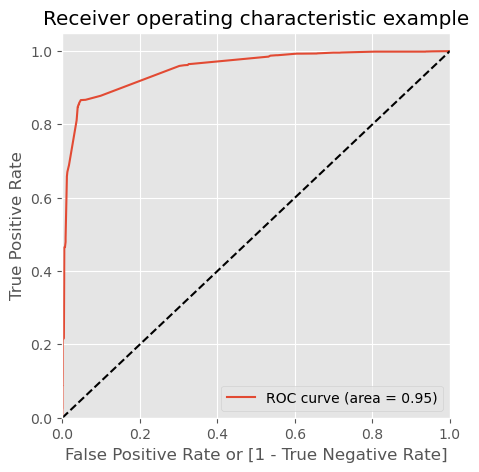

In [405]:
draw_roc(y_train_pred_final.Convert,y_train_pred_final.Convert_prob)

### Step 12: Finding the optimal cutoff point

In [406]:
# creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x>i else 0)

In [407]:
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,Predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014273,5310,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.189663,2181,0,0,1,1,0,0,0,0,0,0,0,0
2,0,0.062731,8215,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.701823,8887,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.268199,7920,0,0,1,1,1,0,0,0,0,0,0,0


In [408]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy_score','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    (cm,accuracy_score,sensitivity,specificity) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    cutoff_df.loc[i] = [i, accuracy_score, sensitivity, specificity]
    
cutoff_df

,probability,accuracy_score,sensitivity,specificity
0.0,0.0,0.394598,1.000000,0.000000
0.1,0.1,0.789041,0.961841,0.676410
0.2,0.2,0.801304,0.959481,0.698205
0.3,0.3,0.892114,0.878049,0.901282
0.4,0.4,0.916641,0.854839,0.956923
0.5,0.5,0.917262,0.854839,0.957949
0.6,0.6,0.916641,0.851692,0.958974
0.7,0.7,0.903136,0.810779,0.963333
0.8,0.8,0.862155,0.670338,0.987179
0.9,0.9,0.856411,0.653816,0.988462


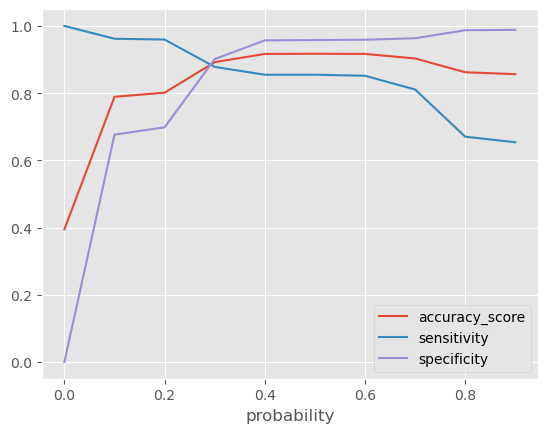

In [409]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy_score','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.27 is the optimum point to take it as a cutoff probability.¶

In [410]:
y_train_pred_final = y_train_pred_final[['Convert','Convert_prob','Prospect_ID']]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x>.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,Convert_predicted,Lead_Score
0,0,0.014273,5310,0,1
1,0,0.189663,2181,0,19
2,0,0.062731,8215,0,6
3,0,0.701823,8887,1,70
4,0,0.268199,7920,0,27


In [411]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

Final Model evaluation on train set
Confusion Matrix :
 [[3515  385]
 [ 310 2232]]
Accuracy : 0.892114250232847
Sensitivity : 0.8780487804878049
Specificity : 0.9012820512820513


(array([[3515,  385],
        [ 310, 2232]], dtype=int64),
 0.892114250232847,
 0.8780487804878049,
 0.9012820512820513)

### Getting the predicted values on the test set

In [412]:

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True)
y_test_df.rename(columns = {'index':'Prospect_ID'}, inplace=True)


X_test_sm = sm.add_constant(X_test[cols])
y_test_pred = res.predict(X_test_sm)



y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_test_predicted_final['final_predicted'] = y_test_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_test_predicted_final['Lead_Score'] = y_test_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_test_predicted_final.head()

,Prospect_ID,Converted,Converting_Probability,final_predicted,Lead_Score
0,2400,1,0.986528,1,99
1,849,0,0.062731,0,6
2,7459,0,0.007467,0,1
3,6184,1,0.008746,0,1
4,4869,1,0.977362,1,98


In [414]:
# Evaluating model performance on test data

evaluate_model(y_test_predicted_final.Converted, y_test_predicted_final.final_predicted, print_score=True)

Final Model evaluation on train set
Confusion Matrix :
 [[1594  178]
 [ 108  882]]
Accuracy : 0.8964518464880521
Sensitivity : 0.8909090909090909
Specificity : 0.899548532731377


(array([[1594,  178],
        [ 108,  882]], dtype=int64),
 0.8964518464880521,
 0.8909090909090909,
 0.899548532731377)

In [415]:
## Features of the final model
print("Features used in Final Model :", cols)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                                  -1.452202
Lead Source_Welingak Website                            5.259075
Last Activity_SMS Sent                                  1.859773
What is your current occupation_Working Professional    1.331431
Tags_Busy                                               4.253212
Tags_Closed by Horizzon                                 9.066551
Tags_Lost to EINS                                       9.809386
Tags_Ringing               

In [ ]:

Final Model evaluation on train set
Confusion Matrix :
 [[3515  385]
 [ 310 2232]]
==============================
Accuracy : 0.892114250232847
==============================
Sensitivity : 0.8780487804878049
==============================
Specificity : 0.9012820512820513
==============================

In [ ]:
Final Model evaluation on test set
Confusion Matrix :
 [[1594  178]
 [ 108  882]]
==============================
Accuracy : 0.8964518464880521
==============================
Sensitivity : 0.8909090909090909
==============================
Specificity : 0.899548532731377

Conclusion:
- Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert).
- Our final Logistic Regression Model is built with 13 features.
- Features used in Final Model : 'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'
- The final model has Sensitivity of 0.89, this means the model is able to predict 89% customers out of all the converted customers, (Positive conversion) correctly.
